In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mp

from sklearn.preprocessing import normalize

from collections import Counter

import seaborn as sns
from activ.nmf.viz import weights_clustermap, bases_heatmap, get_labels
import activ

In [2]:
raw_data = activ.load_data()
nmf_data = activ.load_data(uoinmf=True)

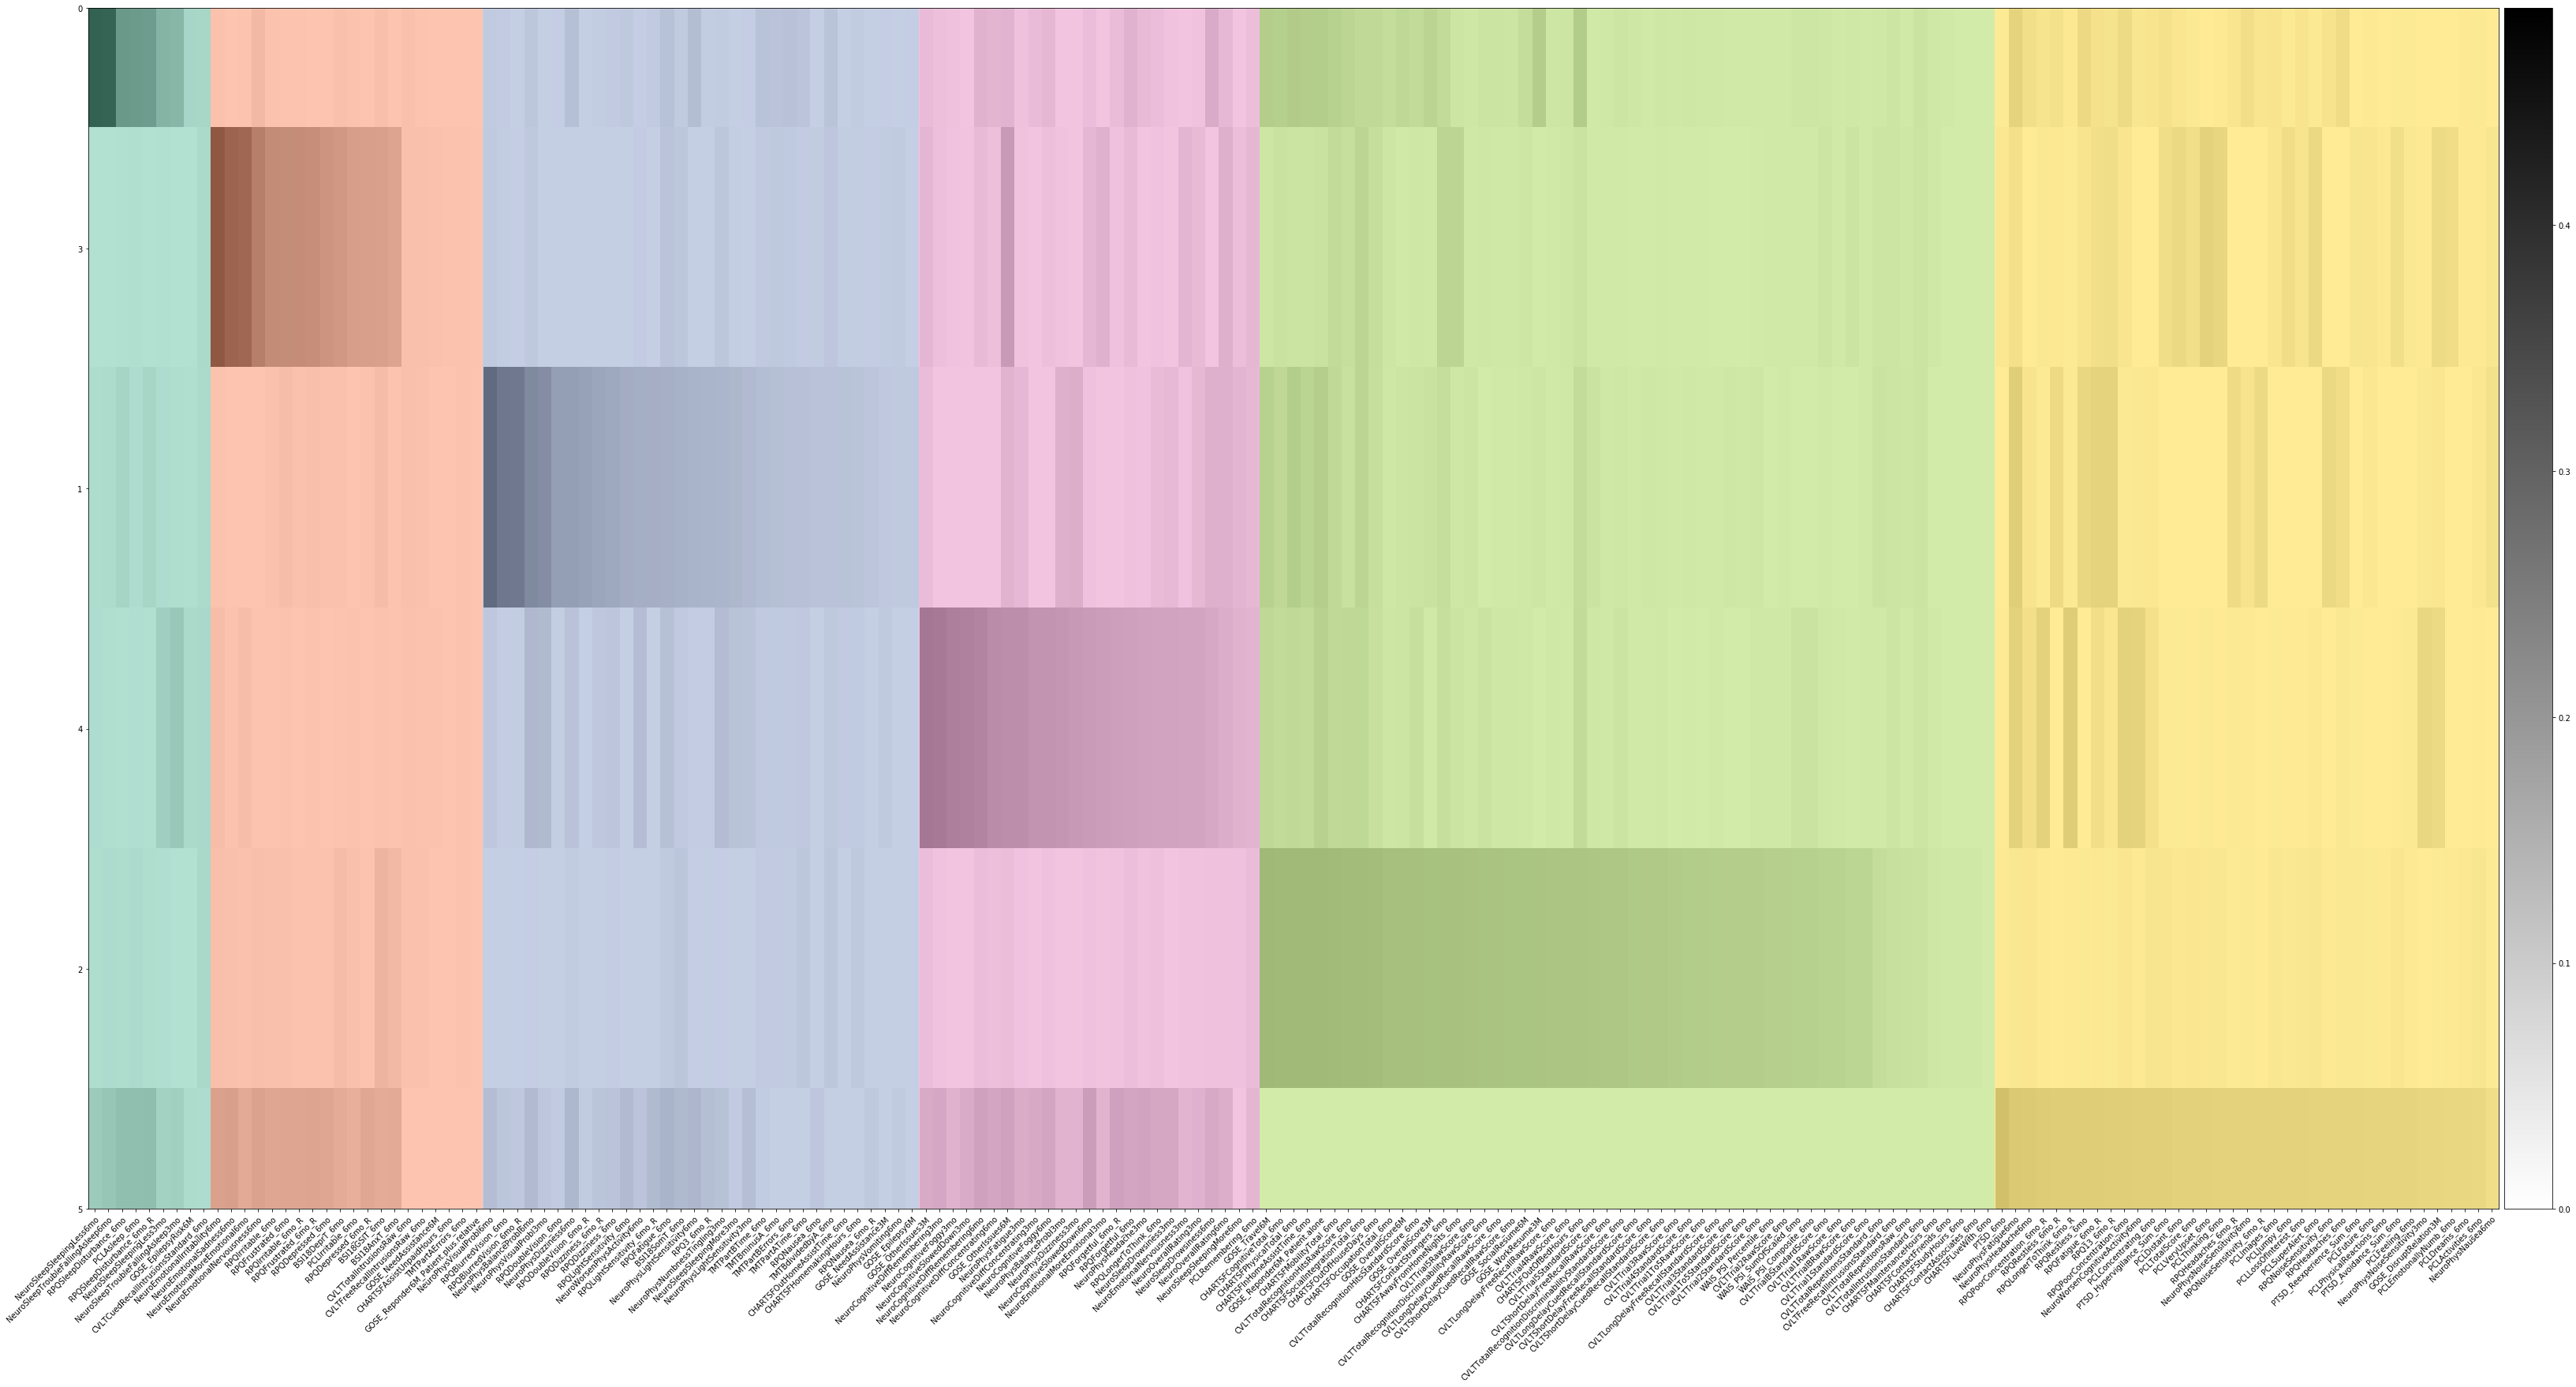

In [3]:
plt.figure(figsize=(56,28))
colors = sns.color_palette('Set2', nmf_data.outcome_bases.shape[0])
im, row_order, col_order = bases_heatmap(nmf_data.outcome_bases, aspect='auto', col_labels=raw_data.outcome_features, highlight_weight=0.50, highlight=colors)

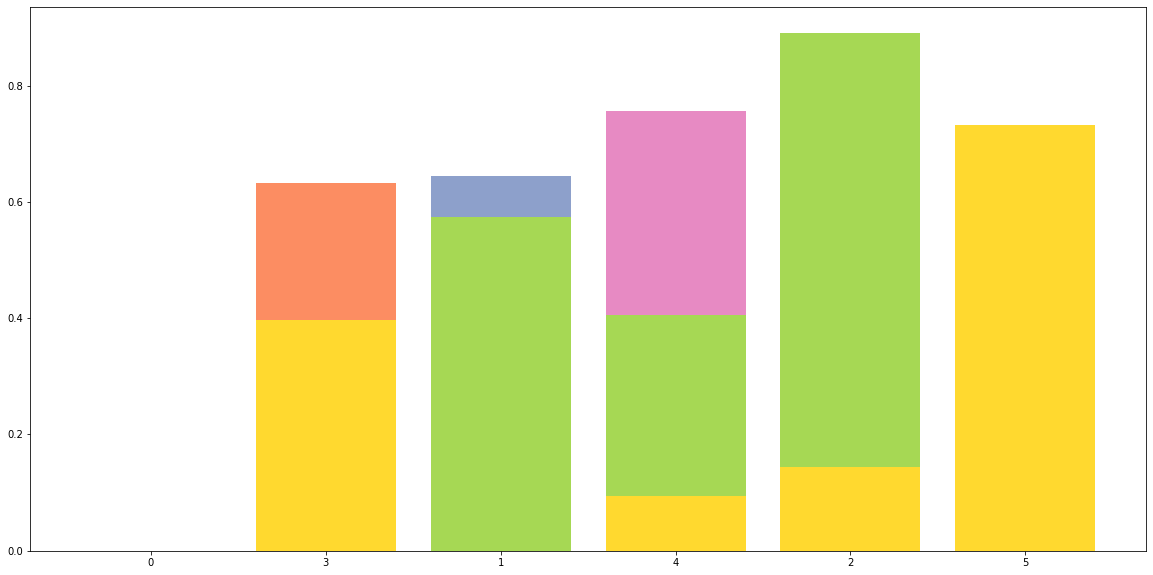

In [4]:
plt.figure(figsize=(20, 10))


ax = plt.gca()

bm = nmf_data.outcomes

domfac = np.argmax(bm, axis=1)

stacked = np.zeros((bm.shape[1], bm.shape[1]))
bm_norm = normalize(bm)
for b in row_order:
    subset = bm_norm[domfac == b]
    if subset.shape[0] == 0:
        continue
    stacked[b] = np.sum(subset, axis=0)/subset.shape[0]
stacked = stacked[row_order][:, row_order]

x = np.array(row_order)
x = np.arange(bm.shape[1])
for i in range(stacked.shape[1]):
    ax.bar(x, stacked[:, i], color=colors[i])
ax.set_xticks(x)
ret = ax.set_xticklabels(row_order)

In [6]:
weights_clustermap(nmf_data.outcomes)

IndexError: list index out of range

<Figure size 720x720 with 0 Axes>

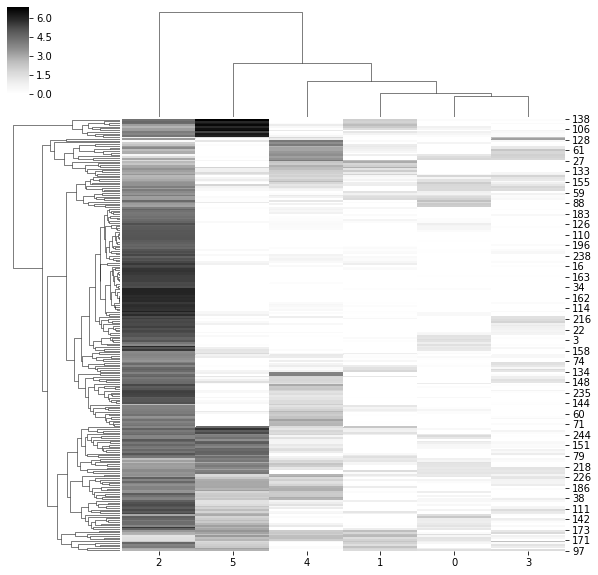

In [9]:
sns.clustermap(nmf_data.outcomes, cmap='Greys')